Calculating price predictions on data using XGBoostRegressor

In [1]:
import pandas as pd

import numpy as np

In [2]:

EU_predictions = pd.read_csv('/Users/baytech11/Desktop/Agnes/Springboard/Capstone_3/modeling_data_EU')



In [3]:
EU_predictions.head(3)

,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country,min_age,max_age,avg_age,price_per_piece
0,1032.0,3.6,3,4.6,Architecture,4.3,AU,12.0,99.0,55.5,0.110458
1,744.0,3.2,4,4.6,Architecture,4.1,AU,12.0,99.0,55.5,0.102140
2,597.0,3.7,3,4.9,Architecture,4.4,AU,12.0,99.0,55.5,0.101830


In [4]:
EU_predictions = pd.get_dummies(EU_predictions, columns=['theme_name', 'country' ], drop_first=False)

In [5]:
import xgboost as xg

In [6]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

In [7]:
X= EU_predictions.drop("price_per_piece", axis=1).values

y = EU_predictions['price_per_piece'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 50)

In [9]:
xgb = XGBRegressor()


In [10]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [11]:
xgb.score(X_test, y_test)

0.9800613785956093

In [12]:
xgb_predict = xgb.predict(X_test[0:10])

In [13]:
xgb_predict

array([0.17332566, 0.10441141, 0.09875355, 0.1218402 , 0.32771027,
       0.30891094, 0.15723598, 0.11719816, 0.160633  , 0.18658882],
      dtype=float32)

In [14]:
print('Predicted EU, AU and NZ Price per Piece:')
print(('Min'),np.min(xgb_predict))
print(('Max'), np.max(xgb_predict))
print(('Median'), np.median(xgb_predict))
print(('Mean'), np.mean(xgb_predict))

Predicted EU, AU and NZ Price per Piece:
Min 0.09875355
Max 0.32771027
Median 0.15893449
Mean 0.1756608


In [15]:
predictions = pd.DataFrame(X_test[0:10], columns = [EU_predictions.drop("price_per_piece", axis=1)])

In [16]:
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 58 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   (piece_count,)                                       10 non-null     float64
 1   (play_star_rating,)                                  10 non-null     float64
 2   (review_difficulty,)                                 10 non-null     float64
 3   (star_rating,)                                       10 non-null     float64
 4   (val_star_rating,)                                   10 non-null     float64
 5   (min_age,)                                           10 non-null     float64
 6   (max_age,)                                           10 non-null     float64
 7   (avg_age,)                                           10 non-null     float64
 8   (theme_name_Architecture,)                           10 non-null     floa

In [17]:
pd.set_option('display.max_columns', None)
predictions.head(10)

,piece_count,play_star_rating,review_difficulty,star_rating,val_star_rating,min_age,max_age,avg_age,theme_name_Architecture,theme_name_BOOST,theme_name_BrickHeadz,theme_name_Carnotaurus Gyrosphere Escape,theme_name_Classic,theme_name_Creator 3-in-1,theme_name_Creator Expert,theme_name_DC Comics™ Super Heroes,theme_name_DIMENSIONS™,theme_name_Dilophosaurus Outpost Attack,theme_name_Disney™,theme_name_Elves,theme_name_Friends,theme_name_Ghostbusters™,theme_name_Ideas,theme_name_Indoraptor Rampage at Lockwood Estate,theme_name_Juniors,theme_name_Jurassic Park Velociraptor Chase,theme_name_MINDSTORMS®,theme_name_Marvel Super Heroes,theme_name_Minecraft™,theme_name_Minifigures,theme_name_NEXO KNIGHTS™,theme_name_NINJAGO®,theme_name_Pteranodon Chase,theme_name_Speed Champions,theme_name_Star Wars™,theme_name_Stygimoloch Breakout,theme_name_THE LEGO® BATMAN MOVIE,theme_name_THE LEGO® NINJAGO® MOVIE™,theme_name_Technic,country_AT,country_AU,country_BE,country_CH,country_CZ,country_DE,country_DN,country_ES,country_FI,country_FR,country_GB,country_IE,country_IT,country_LU,country_NL,country_NO,country_NZ,country_PL,country_PT
0,91.0,4.7,2.0,4.3,4.0,6.0,12.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,181.0,4.7,2.0,4.9,4.8,7.0,14.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,494.0,4.6,3.0,4.5,4.8,8.0,14.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1416.0,4.6,3.0,4.8,4.4,9.0,14.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,3.3,1.0,4.0,4.0,7.0,14.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,95.0,5.0,1.0,5.0,4.0,4.0,7.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,201.0,4.1,2.0,4.6,4.4,7.0,14.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,554.0,3.9,4.0,4.0,3.8,9.0,14.0,11.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,425.0,3.2,3.0,3.2,2.6,7.0,14.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,67.0,5.0,1.0,5.0,4.0,4.0,7.0,5.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Plotting Results

In [18]:
import matplotlib.pyplot as plt

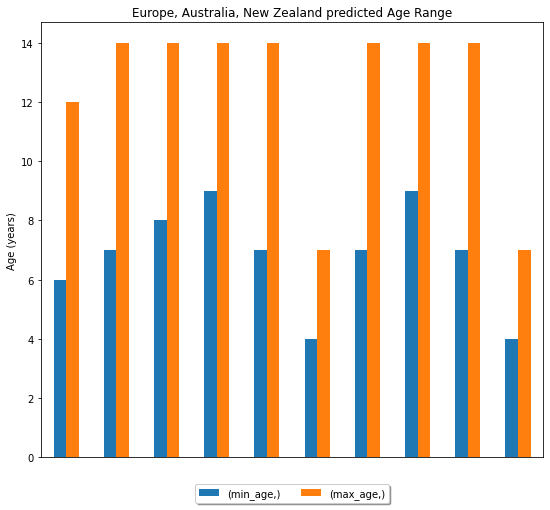

In [19]:

predictions.plot( y=["min_age", "max_age"], kind="bar", figsize=(9, 8))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
plt.title('Europe, Australia, New Zealand predicted Age Range')
plt.ylabel('Age (years)') 
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

Text(0, 0.5, 'Piece Count')

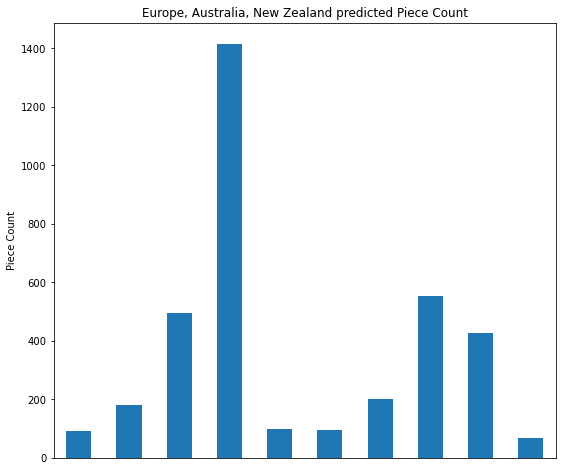

In [20]:

predictions.plot( y='piece_count', kind="bar", figsize=(9, 8), legend=None)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 
plt.title('Europe, Australia, New Zealand predicted Piece Count')
plt.ylabel('Piece Count') 


In [21]:


us = {'Min': 0.09875355,
'Max': 0.32771027,
'Median': 0.15893449,
'Mean': 0.1756608}



Text(0, 0.5, 'Price per Piece')

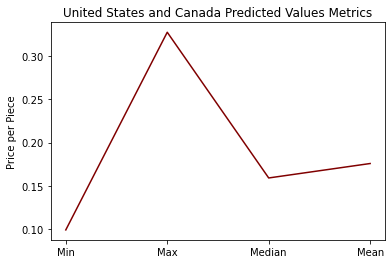

In [22]:
plt.plot(list(us.keys()), list(us.values()),color='maroon')
plt.title('United States and Canada Predicted Values Metrics')
plt.ylabel('Price per Piece')

In [23]:
eu = {'Min': 0.07115805,
'Max': 0.10931567,
'Median': 0.09192541,
'Mean': 0.09150849}

Text(0, 0.5, 'Price per Piece')

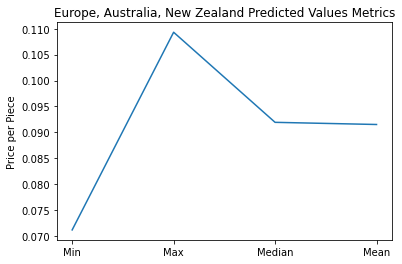

In [24]:
plt.plot(list(eu.keys()), list(eu.values()))
plt.title('Europe, Australia, New Zealand Predicted Values Metrics')
plt.ylabel('Price per Piece')